In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
%matplotlib inline

# Load Data

In [14]:
merged_df = pd.read_csv("/home/jpalmo/fs09/Projects/O3Fire/model_eval/output/model_obs_2025.4.16.csv")
merged_df['NOx_model'] = merged_df['NO_model'] + merged_df['NO2_model']
merged_df['NOx_nested_model'] = merged_df['NO_nested_model'] + merged_df['NO2_nested_model']

/tmp/ipykernel_4045056/1964588775.py:1: DtypeWarning: Columns (240,242) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("/home/jpalmo/fs09/Projects/O3Fire/model_eval/output/model_obs_2025.4.16.csv")


# Plot

### Figure S14

In [15]:
# Define the minimum and maximum values (equivalent to 10^0 and 10^2.3 for log scaling)
min_value = 0.
max_value = 200

# Define the number of bins
num_bins = 10

# Generate bins that are spaced according to the square root
sqrt_bins = np.linspace(np.sqrt(min_value), np.sqrt(max_value), num_bins)**2

In [39]:
species_labels = {
    'NOx': r'$NO_x$',
    # 'NO': r'$NO$',
    # 'NO2': r'$NO_2$',
    'HNO3': r'$HNO_3$',
    'PAN': r'$PAN$', 
    'HNO2': r'$HONO$',  
}


# Define hatches for each species (NOx, HNO3, PAN, HNO2)
species_hatches = ['', 'xxxx', '+', '....']  # Different hatches for NOx, HNO3, PAN, HNO2

# Define alpha values for each species
species_alpha = [1, 0.8, 0.6, 0.4]  # Transparency for NOx, HNO3, PAN, HNO2

In [40]:
# Choose a continuous colormap (e.g., "viridis")
continuous_cmap = plt.get_cmap("magma")

# Define the number of bins/colors in the qualitative colormap
n_colors = 7

# Create the qualitative colormap by discretizing the continuous colormap
qualitative_cmap = mcolors.ListedColormap(continuous_cmap(np.linspace(0, 1, n_colors)))

In [41]:
log_bins = np.logspace(-0,2.3,10)
bin_centers = 0.5*(log_bins[1:] + log_bins[:-1])

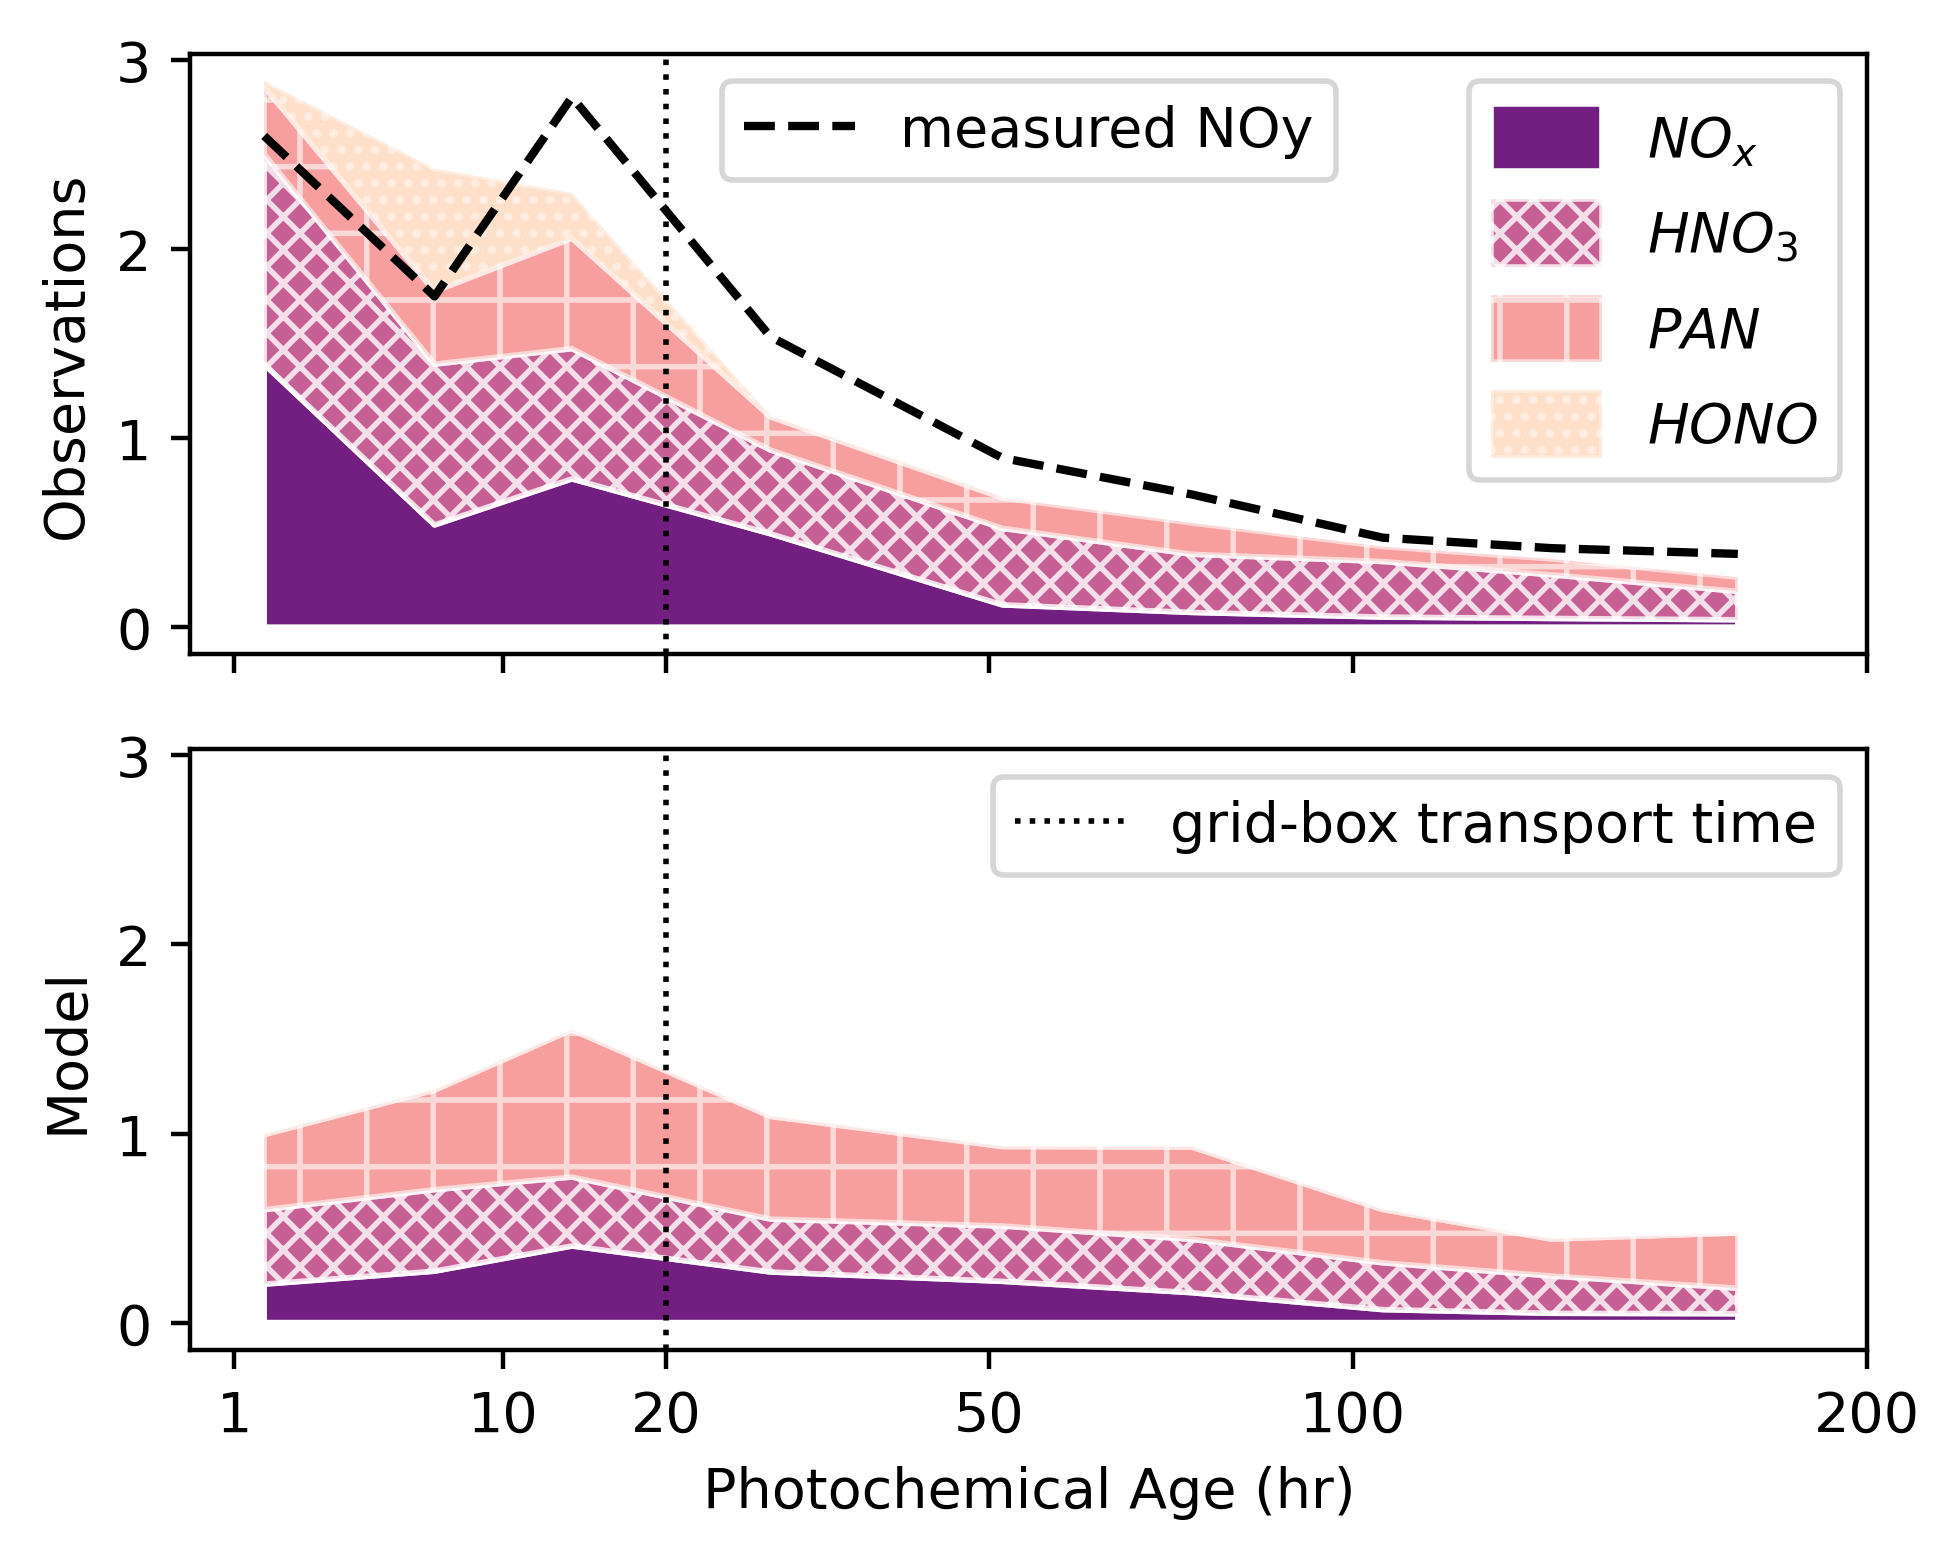

In [43]:
col = 'NOy'
model_col = f'NOy_model'
nested_model_col = f'NOy_nested_model'

model_colors = {model_col: 'salmon', col:'k', nested_model_col:'red'}
model_style = {model_col: '-', col:'-', nested_model_col:':'}

fig, axs = plt.subplots(2, 1, sharex=True,sharey=True, figsize=(5,4), dpi=400)

# log_bins = np.logspace(-0,2.3,11)
log_bins = sqrt_bins

tmp = merged_df.copy(deep=True)
# tmp[model_col] = tmp[model_col]*1e9
# tmp[nested_model_col] = tmp[nested_model_col]*1e9
# tmp[col] = tmp[col]*1e-3

# Split tmp by log_bins along the age axis
tmp['age_bin'] = pd.cut(tmp['age'], bins=log_bins, labels=bin_centers)

# Compute the average age within each bin
tmp['avg_age'] = tmp.groupby('age_bin')['age'].transform('mean')

time = []
NOxNOy = []
PANNOy = []
HNO3NOy = []
HNO2NOy = []
N2O5NOy = []
otherNOy = []
NOxNOy_model = []
PANNOy_model = []
HNO3NOy_model = []
HNO2NOy_model = []
N2O5NOy_model = []
otherNOy_model = []

NOy = []
NOy_model = []
for r,g in tmp.groupby('age_bin'):
    time.append(g['avg_age'].mean())
    NOxNOy.append((g['NOx'].mean()))
    PANNOy.append((g['PAN'].mean()))
    HNO3NOy.append((g['HNO3'].mean()))
    HNO2NOy.append((g['HNO2'].mean()))
    # N2O5NOy.append((g['N2O5'].mean()))
    NOy.append((g['NOy'].mean()))
    # otherNOy.append(( - ((g['NOx'].mean()/g['NOy'].mean()) + (g['PAN'].mean()/g['NOy'].mean()) + (g['HNO3'].mean()/g['NOy'].mean()) + (g['HNO2'].mean()/g['NOy'].mean()))))
    NOxNOy_model.append((g['NOx_model'].mean()))
    PANNOy_model.append((g['PAN_model'].mean()))
    HNO3NOy_model.append((g['HNO3_model'].mean()))
    HNO2NOy_model.append((g['HNO2_model'].mean()))
    # N2O5NOy_model.append((g['N2O5_model'].mean()))
    NOy_model.append((g['NOy_model'].mean()))
    # otherNOy_model.append((1 - (g['NOx_model']/g['NOy_model'] + g['PAN_model']/g['NOy_model'] + g['HNO3_model']/g['NOy_model'] + g['HNO2_model']/g['NOy_model']).mean()))

time = np.array(time)
NOxNOy = np.array(NOxNOy)
PANNOy = np.array(PANNOy)
HNO3NOy = np.array(HNO3NOy)
HNO2NOy = np.array(HNO2NOy)
N2O5NOy = np.array(N2O5NOy)
otherNOy = np.array(otherNOy)
NOxNOy_model = np.array(NOxNOy_model)
PANNOy_model = np.array(PANNOy_model)
HNO3NOy_model = np.array(HNO3NOy_model)
HNO2NOy_model = np.array(HNO2NOy_model)
N2O5NOy_model = np.array(N2O5NOy_model)
otherNOy_model = np.array(otherNOy_model)

# Stacking the data
NOy_stack = np.vstack([NOxNOy, PANNOy, HNO3NOy, HNO2NOy,])*1e-3 # otherNOy])
top_down = np.array(NOy)*1e-3
NOy_model_stack = np.vstack([NOxNOy_model, PANNOy_model, HNO3NOy_model, HNO2NOy_model,])*1e9 # otherNOy_model])
# NOy_stack = np.vstack([N2O5NOy])*1e-3 # otherNOy])
# NOy_model_stack = np.vstack([ N2O5NOy_model])*1e9 # otherNOy_model])

colors = [qualitative_cmap(i) for i in range(2,6)]
# axs[0].stackplot(time, NOy_stack, colors=colors, labels=species_labels, hatch=species_hatches, alpha=species_alpha)
# axs[1].stackplot(time, NOy_model_stack, labels=['NOx', 'PAN', 'HNO3', 'HNO2',], colors=colors)


# Loop over each species and plot individually
for i, (data, label, hatch, alpha) in enumerate(zip(NOy_stack, species_labels.values(), species_hatches, species_alpha)):
    axs[0].fill_between(
        time, 
        np.sum(NOy_stack[:i+1], axis=0), 
        np.sum(NOy_stack[:i], axis=0) if i > 0 else 0,  # Start from zero for the first species
        label=label,
        facecolor=colors[i],  # Use predefined colors from your colormap
        edgecolor='white',
        hatch=hatch,
        alpha=alpha
    )

# Loop over each species and plot individually
for i, (data, label, hatch, alpha) in enumerate(zip(NOy_stack, species_labels.values(), species_hatches, species_alpha)):
    axs[1].fill_between(
        time, 
        np.sum(NOy_model_stack[:i+1], axis=0), 
        np.sum(NOy_model_stack[:i], axis=0) if i > 0 else 0,  # Start from zero for the first species
        label=label,
        facecolor=colors[i],  # Use predefined colors from your colormap
        edgecolor='white',
        hatch=hatch,
        alpha=alpha
    )

# Create custom legend patches with grey color and respective hatches
legend1 = axs[0].legend( handleheight=1.5, loc='upper right')
line, = axs[0].plot(time, top_down, color='black', linestyle='--', label='measured NOy')
axs[0].add_artist(legend1)
legend2 = axs[0].legend([line], ['measured NOy'], loc='upper center')

# axs[0].set_yscale('log')
# Define square root scaling for the x-axis (only works for positive values)
axs[0].set_xscale('function', functions=(np.sqrt, np.square))
# axs[0].set_title('The Evolution of $NO_y$ Speciation in Smoke',)

axs[0].set_ylabel(r'Observations',)
axs[1].set_ylabel(r'Model',)
# axs[0].set_ylabel(r'Fraction of $NO_y$',)
axs[1].set_xlabel('Photochemical Age (hr)')

# axs[0].legend(fontsize=9)
axs[0].tick_params(axis='both', which='major',)
axs[1].tick_params(axis='both', which='major',)

axs[1].set_xticks([1, 10, 20, 50, 100, 200])
axs[1].set_xticklabels([1, 10, 20, 50, 100, 200])

axs[0].axvline(x=20, label="transport time", color='black', linestyle=':', linewidth=1)
vline = axs[1].axvline(x=20, label="transport time", color='black', linestyle=':', linewidth=1)
axs[1].legend([vline], ['grid-box transport time'], loc='upper right')

# axs[0].set_ylim(0,1.0)

# axs[0].legend()

fig.set_tight_layout('tight')

#save figure as pdf
plt.savefig("../../figures/supfig_14.pdf", bbox_inches='tight', dpi=300)
plt.show()